In [1]:
!pip install JasonUtils
!pip install codetiming

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils.validation import check_is_fitted, check_X_y

# 01 - load dataset

In [3]:
# 01 - load dataset
iris = datasets.load_iris()

In [4]:
# Convert iris to dataframe
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

In [46]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
# copy original iris 
iris_df_copy = iris_df.copy()

# 02 - Drop the petal length and petal width features

In [7]:
# 02 - Drop the petal length and petal width features
iris_df_copy.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace= True)
iris_df_copy.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


## Method to plot decision boundary of the estimator

In [8]:
def plotDecisionBoundary(X, y, est, title=''):
    plt.close('all')
    plt.figure()
    cm = plt.cm.Set1
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = est.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    plt.scatter(
        X.iloc[:, 0],
        X.iloc[:, 1],
        c=y,
        cmap=cm,
        edgecolors='k',
        alpha=1,
    )
    plt.title(title)
    plt.legend(labels)
    plt.show()

In [9]:
# Split the data to train and test
X = iris_df_copy.iloc[:, :2].values
y = iris_df_copy.iloc[:, 2].values

labels = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [10]:
def build_classifier(estimator_obj, X_train, X_test, y_train, y_test, title=''):

    model = estimator_obj.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_for_trainData = model.predict(X_train)

    print('\nClassification Report:\n')
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------\n")

    train_acc = accuracy_score(y_train, y_pred_for_trainData)
    print("Train Accuracy: {:.2f}\n".format(train_acc))

    train_precision = precision_score(y_train, y_pred_for_trainData, average='macro')
    print("precision score for train: {:.2f}\n".format(train_precision))

    train_recall = recall_score(y_train, y_pred_for_trainData, average='macro')
    print("recall score for train: {:.2f}\n".format(train_recall))
    print("---------------------------------------------\n")

    test_acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy: {:.2f}\n".format(test_acc))

    test_precision = precision_score(y_test, y_pred, average='macro')
    print("precision score for test: {:.2f}\n".format(test_precision))

    test_recall = recall_score(y_test, y_pred, average='macro')
    print("recall score for test: {:.2f}\n".format(test_recall))
    print("---------------------------------------------")


    print('\nDecision Boundary for test:\n')
    plotDecisionBoundary(X_test, y_test, model, title)  

    print('\nConfusion Matrix:\n')
    plot_confusion_matrix(model, X_test, y_test, xticks_rotation='horizontal', cmap="OrRd_r")

    return model, y_pred, train_acc, test_acc

# 03 - Apply Naïve Bayes Classifier to get training and testing accuracy


Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.71      0.75      0.73        16
         2.0       0.50      0.44      0.47         9

    accuracy                           0.76        38
   macro avg       0.74      0.73      0.73        38
weighted avg       0.76      0.76      0.76        38

---------------------------------------------

Train Accuracy: 0.81

precision score for train: 0.81

recall score for train: 0.81

---------------------------------------------

Test Accuracy: 0.76

precision score for test: 0.74

recall score for test: 0.73

---------------------------------------------

Decision Boundary for test:



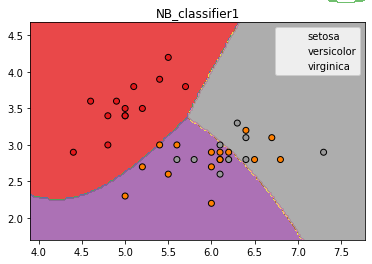


Confusion Matrix:



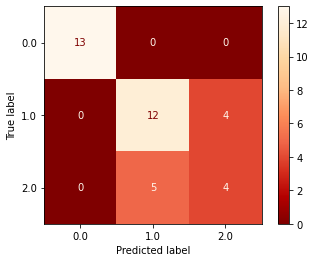

In [11]:
# Build default Naive Bayes model
NB_classifier1 = GaussianNB()
NB1, y_pred1, train_acc1, test_acc1 = build_classifier(NB_classifier1, X_train, X_test, y_train, y_test, "NB_classifier1")

# 04 - Tune hyperparameters of Naive Bayes Classifier (i.e., var_smoothing).
    Try var_smoothing as 1e-9, 1e-8, 1e-7.
    Plot accuracy vs var_smoothing curve for training and testing set

### 4.1.1


Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.71      0.75      0.73        16
         2.0       0.50      0.44      0.47         9

    accuracy                           0.76        38
   macro avg       0.74      0.73      0.73        38
weighted avg       0.76      0.76      0.76        38

---------------------------------------------

Train Accuracy: 0.81

precision score for train: 0.81

recall score for train: 0.81

---------------------------------------------

Test Accuracy: 0.76

precision score for test: 0.74

recall score for test: 0.73

---------------------------------------------

Decision Boundary for test:



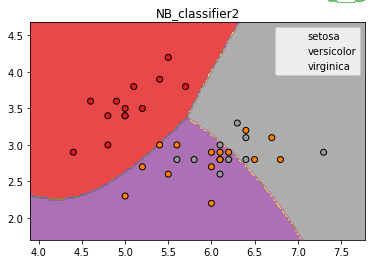


Confusion Matrix:



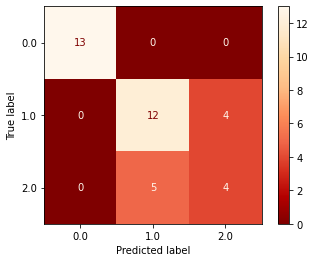

In [12]:
# Build Naive Bayes model with var_smoothing as 1e-9
NB_classifier2 = GaussianNB(var_smoothing= 1e-9)
NB2, y_pred2, train_acc2, test_acc2 = build_classifier(NB_classifier2, X_train, X_test, y_train, y_test, "NB_classifier2")

### 4.1.2


Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.71      0.75      0.73        16
         2.0       0.50      0.44      0.47         9

    accuracy                           0.76        38
   macro avg       0.74      0.73      0.73        38
weighted avg       0.76      0.76      0.76        38

---------------------------------------------

Train Accuracy: 0.81

precision score for train: 0.81

recall score for train: 0.81

---------------------------------------------

Test Accuracy: 0.76

precision score for test: 0.74

recall score for test: 0.73

---------------------------------------------

Decision Boundary for test:



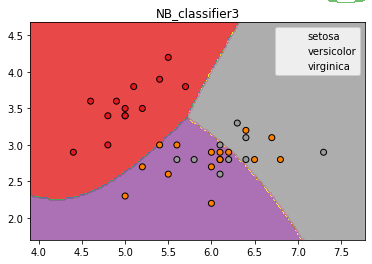


Confusion Matrix:



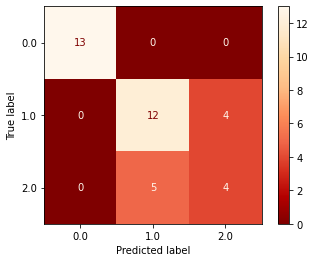

In [13]:
# Build Naive Bayes model with var_smoothing as 1e-8
NB_classifier3 = GaussianNB(var_smoothing= 1e-8)
NB3, y_pred3, train_acc3, test_acc3 = build_classifier(NB_classifier3, X_train, X_test, y_train, y_test, "NB_classifier3")

### 4.1.3


Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.71      0.75      0.73        16
         2.0       0.50      0.44      0.47         9

    accuracy                           0.76        38
   macro avg       0.74      0.73      0.73        38
weighted avg       0.76      0.76      0.76        38

---------------------------------------------

Train Accuracy: 0.81

precision score for train: 0.81

recall score for train: 0.81

---------------------------------------------

Test Accuracy: 0.76

precision score for test: 0.74

recall score for test: 0.73

---------------------------------------------

Decision Boundary for test:



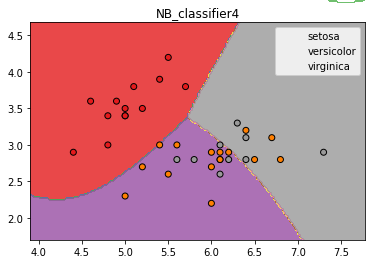


Confusion Matrix:



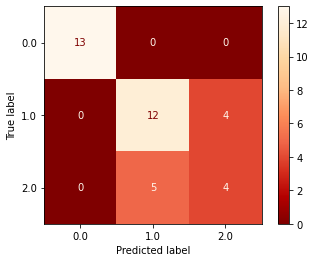

In [14]:
# Build Naive Bayes model with var_smoothing as 1e-7
NB_classifier4 = GaussianNB(var_smoothing= 1e-7)
NB4, y_pred4, train_acc4, test_acc4 = build_classifier(NB_classifier4, X_train, X_test, y_train, y_test, "NB_classifier4")

## 4.2 Plot accuracy vs var_smoothing curve for training and testing set

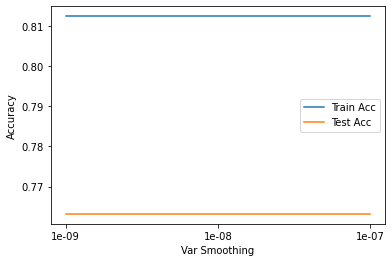

In [15]:
var_smoothing = [1e-9, 1e-8, 1e-7]
train_acc = [train_acc2, train_acc3, train_acc4]
test_acc = [test_acc2, test_acc3, test_acc4]

values = range(len(var_smoothing))

plt.plot(values , train_acc, label= "Train Acc")
plt.plot(values, test_acc, label= "Test Acc")
plt.xlabel("Var Smoothing")
plt.ylabel("Accuracy")
plt.xticks(values, var_smoothing)
plt.legend()
plt.show()

# 05 - Develop Risk-based Bayesian Decision Theory Classifier (RBDTC)

In [16]:
# 5.1
class BayesianDecisionTheoryClassifier(BaseEstimator, ClassifierMixin):
  
    # 5.3
    def __init__(self, estimator, utilityMat):
        self.estimator = estimator
        self.utilityMat = utilityMat

    # 5.4
    def fit(self, X, y):
        # 5.2
        # check inputs
        X_checked, y_checked = check_X_y(X, y)
        self.classes_names = np.unique(labels) #names
        self.classes_ = np.unique(y_checked)   #numbers
        self.estimator_ = clone(self.estimator).fit(X_checked, y_checked)
        return self

    # 5.5
    def predict_proba(self, X):
        # check model status
        check_is_fitted(self)
        prob = self.estimator_.predict_proba(X)
        probList = [(prob * self.utilityMat[index]).sum(axis=1).reshape((-1, 1))
                    for index, c in enumerate(self.classes_)]
        prob = np.hstack(probList)
        return prob

    # 5.6
    def predict_labels(self, X):
       pred = self.predict_proba(X).argmin(axis=1)
       pred_name = self.classes_names[pred]
       return pred_name

    def predict(self, X):
        pred = self.predict_proba(X).argmin(axis=1)
        pred_label = self.classes_[pred]
        return pred_label


# 06 - Apply Risk-based Bayesian Decision Theory Classifier
    which takes Naïve Bayes Classifier as base estimator and uses Table 3 as risk matri

In [44]:
# 6
utilityMat = np.array([
      [-10, -5, -5],
      [-5, -10, -5],
      [-5, -5, -100],])

bdtc = BayesianDecisionTheoryClassifier(NB1, utilityMat)

# 07 - Plot decision boundary and calculate precision, recall and accuracy for training and testing set


Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       1.00      0.06      0.12        16
         2.0       0.36      1.00      0.53         9

    accuracy                           0.58        38
   macro avg       0.79      0.66      0.54        38
weighted avg       0.85      0.58      0.50        38

---------------------------------------------

Train Accuracy: 0.66

precision score for train: 0.68

recall score for train: 0.63

---------------------------------------------

Test Accuracy: 0.58

precision score for test: 0.79

recall score for test: 0.66

---------------------------------------------

Decision Boundary for test:



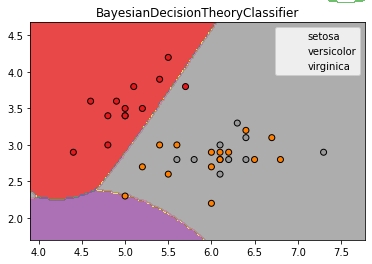


Confusion Matrix:



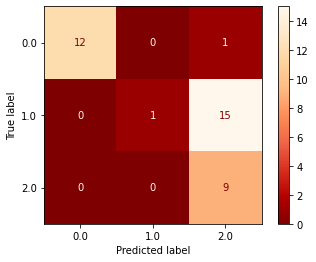

In [45]:
bdtc_model, bdtc_y_pred, bdtc_train_acc, bdtc_test_acc = build_classifier(bdtc, X_train, X_test, y_train, y_test, "BayesianDecisionTheoryClassifier")

In [48]:
y_pred_bdtc = bdtc_model.predict_labels(X_test)
prediction_df = pd.DataFrame(y_pred_bdtc, columns=['y_pred'])
prediction_df.head()

,y_pred
0,virginica
1,virginica
2,setosa
3,virginica
4,setosa
